# Markdown cell
Name : Rutu Ketankumar Shah
Course Title : Advanced Big Data and Data Mining (MSCS-634-M40)
Lab Assignment Title : Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#loading wine data set
wine = load_wine(as_frame=True)
df = wine.frame
print(df.head())

x = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [ ]:
#Basic exploration on feature details

print("Shape of wine data frame", df.shape)
print("Statistics summary", df.describe())

Shape of wine data frame (178, 14)
Statistics summary           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859    

Names of the classes :  ['class_0', 'class_1', 'class_2']


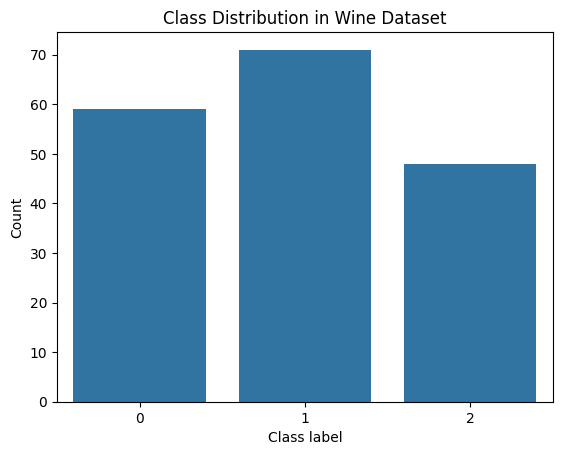

In [ ]:
#class distribution
print("Names of the classes : ", list(wine.target_names))

sns.countplot(x=y)
plt.title('Class Distribution in Wine Dataset')
plt.xlabel('Class label')
plt.ylabel('Count')
plt.show()

In [ ]:
#Standardize the dataset using z-score normalization to ensure consistent scaling across features.


# Initialize and fit the scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Convert the scaled array back to a DataFrame
x_scaled_df = pd.DataFrame(x_scaled, columns=wine.feature_names)

# Display first 5 rows
print(x_scaled_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [ ]:
#step 2 Implement k-mean clustering
# 2.1 Implement the K-Means algorithm with k = 3 (since the Wine dataset has 3 classes).

from sklearn.cluster import KMeans
k=3
# Initialize the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
print(kmeans)

KMeans(n_clusters=3)


In [ ]:
# Train the model and obtain the cluster labels.
kmodelclusterlabel = kmeans.fit_predict(x_scaled)

print("Obtaining first 10 cluster labels",kmodelclusterlabel)

Obtaining first 10 cluster labels [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1
 1 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Calculate the same performance metrics as in Step 2.
# Silhouette Score
# Adjusted Rand Index (ARI).

from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score


#calculated the silhoutte score and adjusted random index for kmeans
silhouette = silhouette_score(x, kmeans.labels_)
ari = adjusted_rand_score(wine.target, kmeans.labels_)

#printed the silhouette score and ari score for kmeans
print(f"Silhouette Score for Kmeans: {silhouette:.2f}")
print(f"Adjusted Rand Index for Kmeans: {ari:.2f}")


Silhouette Score: 0.20
Adjusted Rand Index: 0.85


In [ ]:
# Step 3: Implement K-Medoids Clustering

from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply K-Medoids clustering with k=3
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(x)

# Get cluster labels
kmedoids_labels = kmedoids.labels_

#calculated the silhoutte score and adjusted random index for kmeans
silhouette_kmedoids = silhouette_score(x, kmedoids_labels)
ari_kmedoids = adjusted_rand_score(y, kmedoids_labels)

#printed the silhouette score and ari score for kmeans
print(f"Silhouette Score for K-Medoids: {silhouette_kmedoids:.4f}")
print(f"Adjusted Rand Index (ARI) for K-Medoids: {ari_kmedoids:.4f}")

Silhouette Score for K-Medoids: 0.5666
Adjusted Rand Index (ARI) for K-Medoids: 0.3941


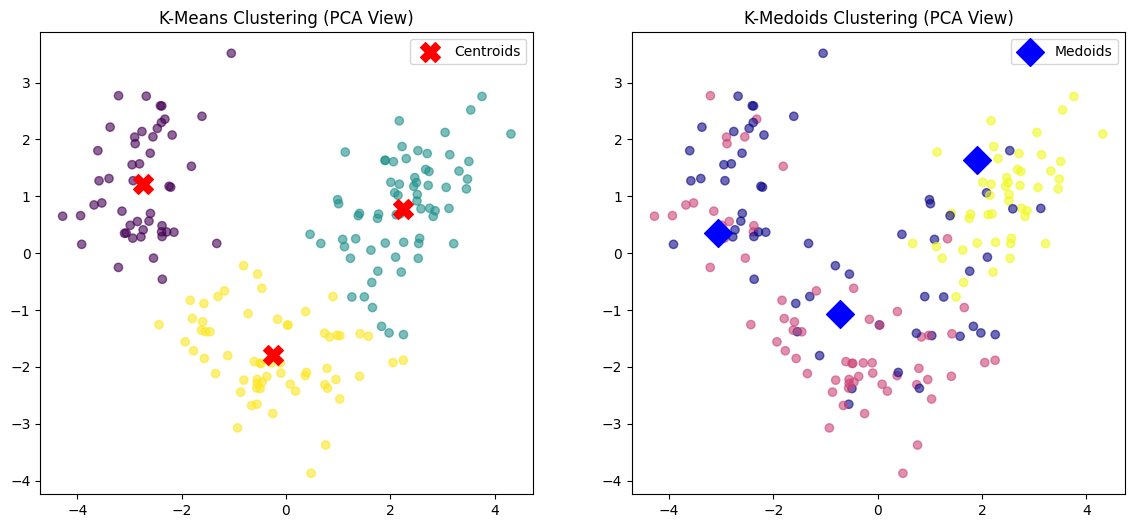

In [ ]:
#step 4:

# Reduce data to 2D for visualization using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# Get cluster centers for K-Means and K-Medoids (in PCA-transformed space)
kmeans_centers_2d = pca.transform(kmeans.cluster_centers_)
kmedoids_centers_2d = pca.transform(x_scaled[kmedoids.medoid_indices_])

# Plotting side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Plot
ax1.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
ax1.scatter(kmeans_centers_2d[:, 0], kmeans_centers_2d[:, 1], c='red', marker='X', s=200, label='Centroids')
ax1.set_title('K-Means Clustering (PCA View)')
ax1.legend()

# K-Medoids Plot
ax2.scatter(x_pca[:, 0], x_pca[:, 1], c=kmedoids_labels, cmap='plasma', alpha=0.6)
ax2.scatter(kmedoids_centers_2d[:, 0], kmedoids_centers_2d[:, 1], c='blue', marker='D', s=200, label='Medoids')
ax2.set_title('K-Medoids Clustering (PCA View)')
ax2.legend()

plt.show()